### Convolution Neural Network (CNN)

Convolution Neural Network (CNN) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as ConvNets. CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to each neuron in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical CNNs have a deep network with a large number of parameters. However, CNNs have a huge advantage over regular neural networks when it comes to image processing: they are able to capture the spatial hierarchies in images, that is, they are able to understand images.


In [4]:
# %pip install pandas numpy matplotlib seaborn sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")

train_data = pd.read_csv("../MIT_6.S191/digit-recognizer/train.csv")
train_data.shape

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = pd.read_csv("../MIT_6.S191/digit-recognizer/test.csv")
test_data.shape

(28000, 784)

In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train = train_data["label"]
X_train = train_data.drop(labels=["label"], axis=1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

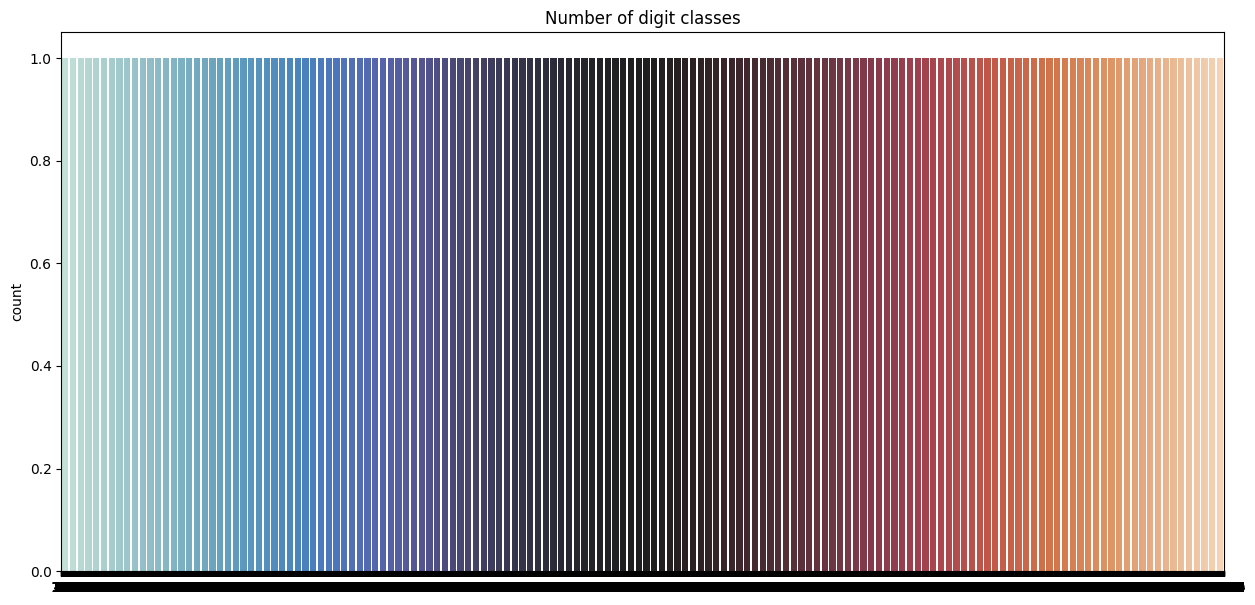

In [ ]:
# Visualize the number of digits classes
plt.figure(figsize=(15, 7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

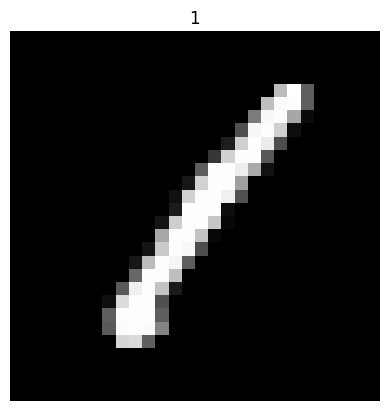

In [ ]:
# Plotting some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap="gray")
plt.title(train_data.iloc[0, 0])
plt.axis("off")
plt.show()

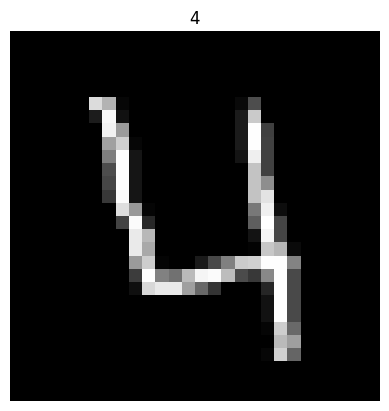

In [ ]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap="gray")
plt.title(train_data.iloc[3, 0])
plt.axis("off")
plt.show()

In [ ]:
# Normalization
X_train = X_train / 255.0
test_data = test_data / 255.0
print("X_train shape: ", X_train.shape)
print("test_data shape: ", test_data.shape)

X_train shape:  (42000, 784)
test_data shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test_data.values.reshape(-1, 28, 28, 1)
print("X_train shape: ", X_train.shape)
print("test_data shape: ", test_data.shape)

X_train shape:  (42000, 28, 28, 1)
test_data shape:  (28000, 784)


In [ ]:
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding

Y_train = to_categorical(Y_train, num_classes=10)

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Verify tensorflow installation
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

NameError: name 'tf' is not defined